# Импорт библиотек

In [ ]:
!pip install autokeras==1.1.0 tensorflow==2.15.1 keras-nlp==0.5.1

INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.1/527.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.1'

In [ ]:
import keras_nlp as nlp
nlp.__version__

'0.5.1'

In [ ]:
# Библиотека матричного вычисления
import numpy as np
# Библиотека для работы с данными
import pandas as pd
# Библиотека AutoML autokeras
import autokeras as ak
# Библиотеки для построения графиков и их стилизации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Утилита для расщепления выборки
from sklearn.model_selection import train_test_split

# Для преобразования категориальных данных в числовые
from sklearn.preprocessing import LabelEncoder

# Токенизатор
from tensorflow.keras.preprocessing.text import Tokenizer

# Для преобразования последовательностей
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Необходимые метрики для построения Матрицы ошибок и отчета о классификации
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка датасета

Одним из популярных датасетов для классификации текстов является датасет обращений граждан "Consumer Complaints" от CFPB (Consumer Financial Protection Bureau).
Бюро финансовой защиты потребителей (CFPB) помогает потребителям, предоставляя образовательные материалы и принимая жалобы. Оно осуществляет надзор за банками, кредиторами и крупными небанковскими организациями, такими как агентства кредитных историй и компании по сбору долгов. Бюро также работает над тем, чтобы информация о кредитных картах, ипотеке и других займах была более понятной, чтобы потребители могли понять свои права и обязанности.

In [ ]:
!wget https://files.consumerfinance.gov/ccdb/complaints.csv.zip

--2025-02-27 12:06:04--  https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Resolving files.consumerfinance.gov (files.consumerfinance.gov)... 3.163.189.99, 3.163.189.64, 3.163.189.18, ...
Connecting to files.consumerfinance.gov (files.consumerfinance.gov)|3.163.189.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1047695442 (999M) [binary/octet-stream]
Saving to: ‘complaints.csv.zip’

complaints.csv.zip  100%[===================>] 999.16M   114MB/s    in 9.3s    

2025-02-27 12:06:13 (108 MB/s) - ‘complaints.csv.zip’ saved [1047695442/1047695442]



In [ ]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "complaints.csv.zip" -d ./dataset

In [ ]:
address = "./dataset/complaints.csv"
df = pd.read_csv(address)

# Выводим первые 5 записей датафрейма
df.head()

<ipython-input-7-f091515026eb>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(address)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-01-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,NY,12543,NaN,NaN,Web,2025-01-29,In progress,Yes,NaN,11825440
1,2025-01-30,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89148,NaN,NaN,Web,2025-01-30,In progress,Yes,NaN,11844247
2,2025-01-29,"Payday loan, title loan, personal loan, or adv...",Installment loan,Problem when making payments,NaN,NaN,NaN,TD BANK US HOLDING COMPANY,FL,33055,NaN,NaN,Phone,2025-02-04,In progress,Yes,NaN,11824206
3,2025-01-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Resurgent Capital Services L.P.,NC,27455,NaN,NaN,Postal mail,2025-01-27,In progress,Yes,NaN,11799137
4,2025-01-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,IL,60609,NaN,NaN,Web,2025-01-28,In progress,Yes,NaN,11810502


# Предобработка данных

In [ ]:
# Оставим только необходимые столбцы
df = df[['Consumer complaint narrative', 'Product']]

# Удалим строки с пустыми значениями
df.dropna(inplace=True)

In [ ]:
print('Найдено дубликатов: ', df.duplicated().sum())

# Удаляем дубликаты
df.drop_duplicates(subset=['Consumer complaint narrative'], inplace = True)

print('Осталось дубликатов после очистки: ', df.duplicated().sum())

Найдено дубликатов:  637230
Осталось дубликатов после очистки:  0


In [ ]:
# Случайная выборка данных (например, 20% от общего количества)
df = df.sample(frac=0.1, random_state=42)

In [ ]:
# Преобразуем категории в числовые значения
le = LabelEncoder()
df['Product'] = le.fit_transform(df['Product'])

# Создание обучающей, проверочной и тестовой выборок

In [ ]:
# Разделим данные на тренировочный, тестовый и контрольный наборы
X_train, X_tmp, y_train, y_tmp = train_test_split(np.array(df['Consumer complaint narrative']), np.array(df['Product']), test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5)

In [ ]:
# Для экономии ОЗУ удаляем уже ненужные данные, после чего python запускает сборщик "мусора" для очистки памяти
del df, X_tmp, y_tmp

# AutoKeras

In [ ]:
# Создание и обучение модели
clf = ak.TextClassifier(overwrite=True, max_trials=2)
result_training = clf.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

# Оценка модели
y_pred = clf.predict(X_test)

Trial 2 Complete [00h 08m 28s]
val_loss: 0.9908005595207214

Best val_loss So Far: 0.8049241900444031
Total elapsed time: 01h 00m 06s
Epoch 1/3
4100/4100 [==============================] - 1038s 253ms/step - loss: 1.1156 - accuracy: 0.6218 - val_loss: 0.8590 - val_accuracy: 0.7033
Epoch 2/3
4100/4100 [==============================] - 1037s 253ms/step - loss: 0.8649 - accuracy: 0.7033 - val_loss: 0.8199 - val_accuracy: 0.7156
Epoch 3/3
879/879 [==============================] - 60s 68ms/step


In [ ]:
# Последовательно экспортируем лучшую модель и по ней выводим отчет
clf.export_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

# Оценка модели

In [ ]:
def plot_graphs(history, key):
    # Используем библиотеку seaborn для задания стиля и цветовой схемы графика
    sns.set_style('darkgrid')
    palette = sns.color_palette('Set1')

    # Задаем размер полотна для рисования графика
    plt.figure(figsize=(12,6))

    # Отображаем график выбранного параметра
    plt.plot(history.history[key],   # данные для построения графика
             marker='o',             # использовать маркер для точек на графике
             color=palette[2],       # использовать цвет третий в палитре (нумерация с 0)
             linewidth=2.5,          # ширина линии
             label=key)              # подпись легенды

    # График для проверочной выборки
    if 'val_'+key in history.history:
        plt.plot(history.history['val_'+key], # данные для построения графика
                 marker='o',                  # использовать маркер для точек на графике
                 color=palette[4],            # использовать цвет пятый в палитре
                 linewidth=2.5,               # ширина линии
                 label='val_'+key)            # подпись легенды

    # Подпись оси Х, размер шрифта - 12
    plt.xlabel("Эпоха", fontsize=12)

    # Подпись оси Y, размер шрифта - 12
    plt.ylabel(key, fontsize=12)

    # Подпись заголовка графика, размер шрифта - 14
    plt.title('Обучающая и проверочная выборки ('+key.title()+')', fontsize=14)

    # Отображение легенды, размер шрифта - 12
    plt.legend(fontsize=12)

    # Задаем сетку на графике
    plt.grid(True)

    # Отрисовываем полотно со всеми графиками
    plt.show()

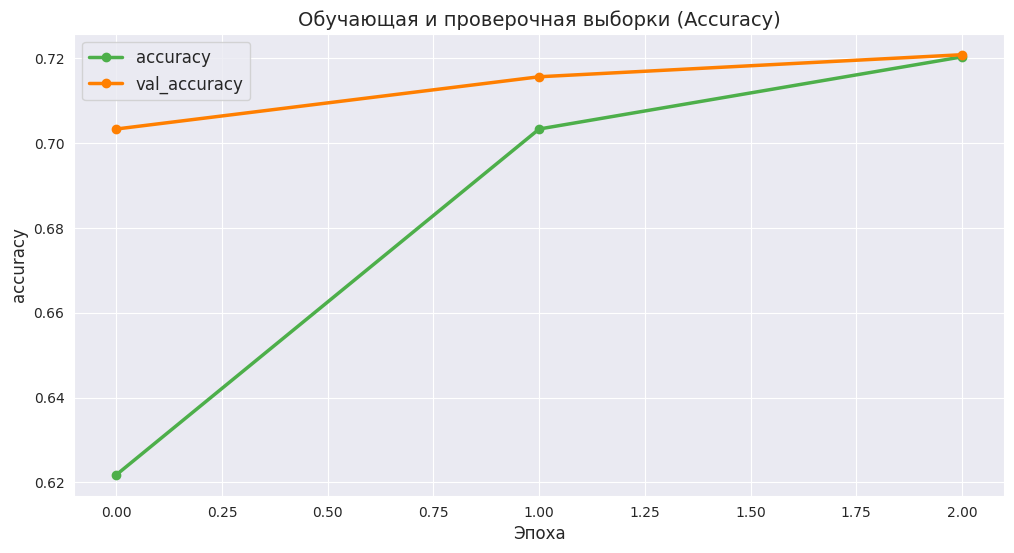

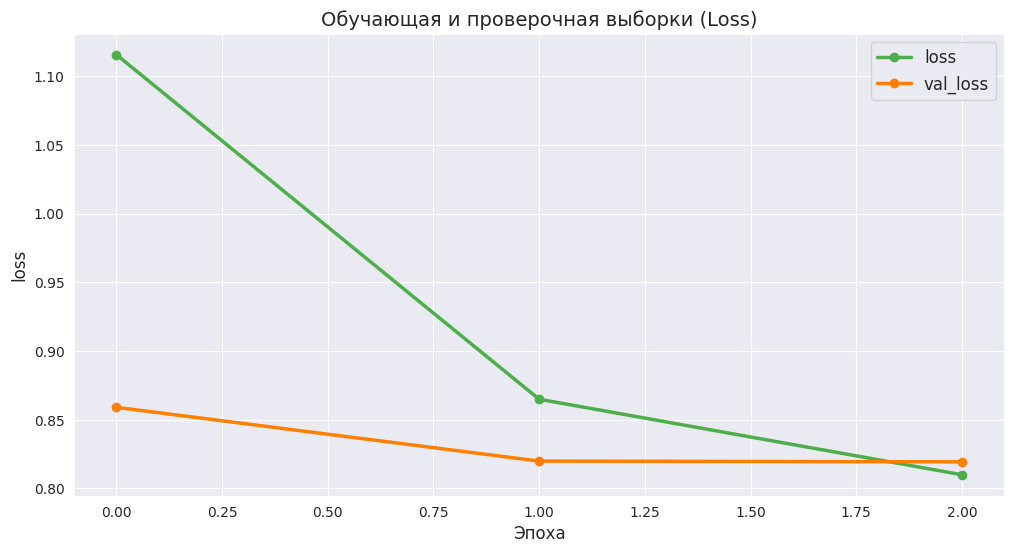

In [ ]:
# Строим график точности
plot_graphs(result_training, "accuracy")

# Строим график потерь
plot_graphs(result_training, "loss")

In [ ]:
y_pred = y_pred.flatten()  # Преобразуем предсказания в одномерный массив

# Преобразуем предсказания и метки тестовых данных в тип int
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.66      0.41      0.50       187
                                                 Checking or savings account       0.72      0.85      0.78      1877
                                                               Consumer Loan       0.56      0.19      0.28       148
                                                                 Credit card       0.63      0.26      0.37       894
                                                 Credit card or prepaid card       0.59      0.64      0.62      1551
                                                            Credit reporting       0.69      0.15      0.24       467
                         Credit reporting or other personal consumer reports       0.85      0.53      0.66      5821
Credit reporting, credit repair services, or other pers

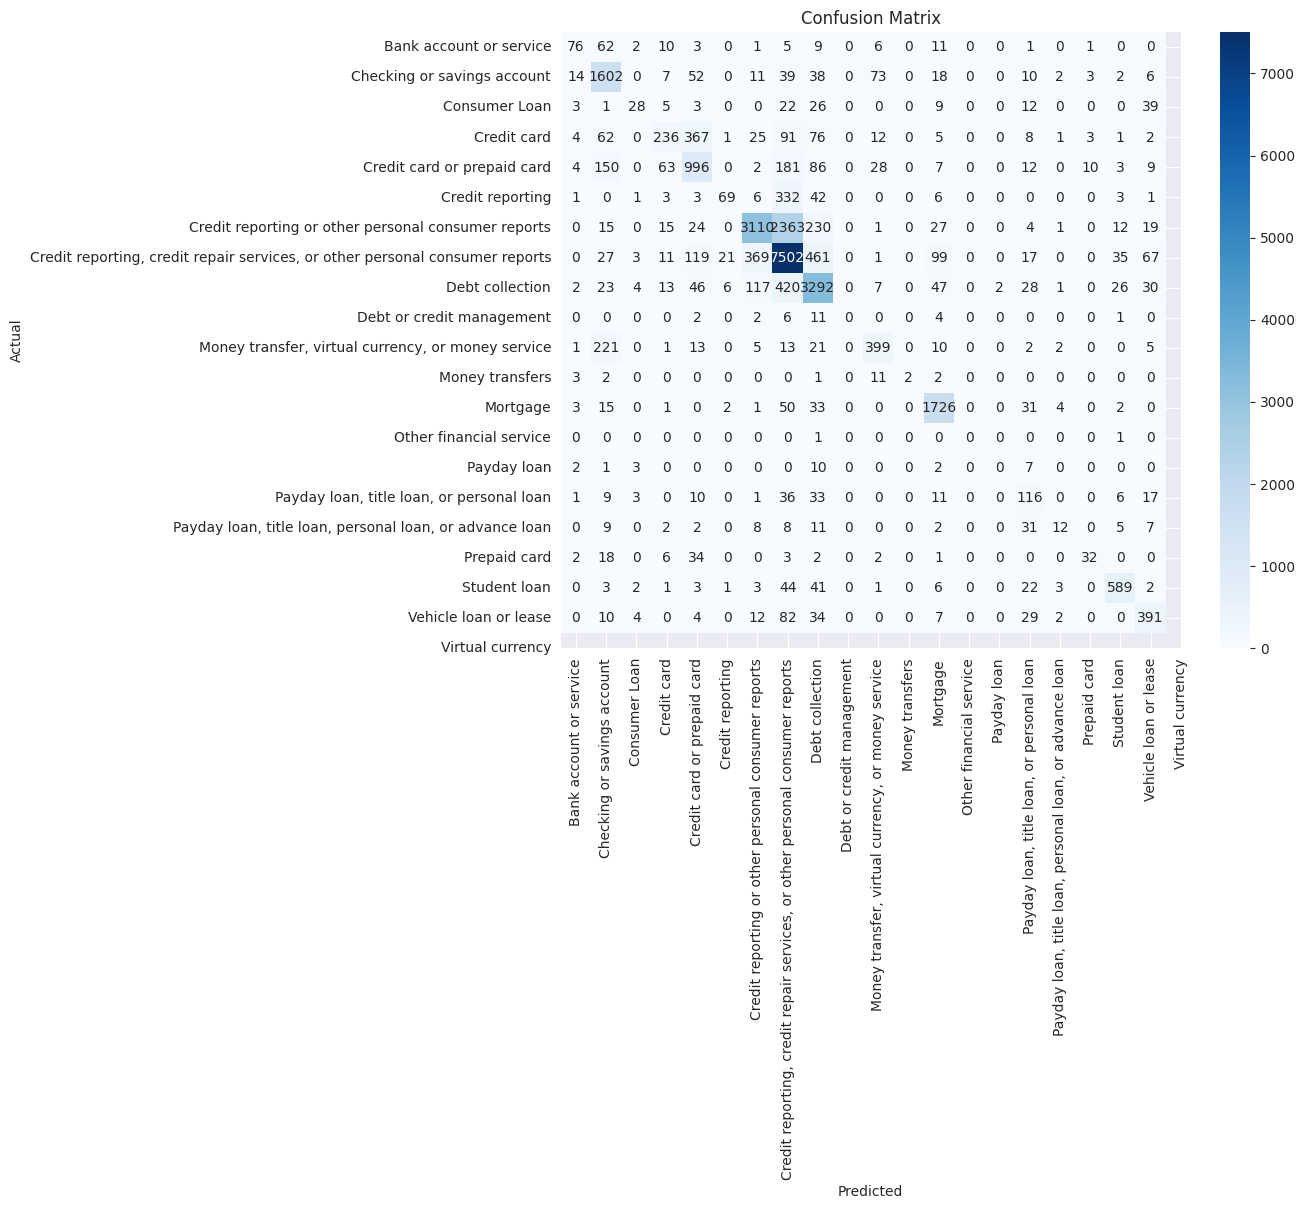

In [ ]:
# Преобразуем предсказания в исходные категории
# y_pred_labels = le.inverse_transform(y_pred.ravel())
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Отчет о классификации
print(classification_report(y_test_labels, y_pred_labels))

# Матрица ошибок
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()